In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

#loading and preprocessing the data
iris=datasets.load_iris()
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target'])
print("ORIGINAL DATA:")
print(df)
df=df[df.target!=2.0]
print("PREPROCESSED DATA:")
print(df)

ORIGINAL DATA:
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]
PREPROCESSED DATA:
    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0      

In [ ]:
#normalize the dataset
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 

#splitting the dataset
train = df.sample(frac=0.6)
remaining_data = df.drop(train.index)

validation = remaining_data.sample(frac=0.5)
test = remaining_data.drop(validation.index)


print("\nTRAIN SET")
print(train)
print("\nVALIDATION SET")
print(validation)
print("\nTEST SET")
print(test)



TRAIN SET
    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
20           0.407407          0.583333  ...          0.058824     0.0
2            0.148148          0.500000  ...          0.058824     0.0
98           0.296296          0.208333  ...          0.588235     1.0
94           0.481481          0.291667  ...          0.705882     1.0
0            0.296296          0.625000  ...          0.058824     0.0
54           0.814815          0.333333  ...          0.823529     1.0
9            0.222222          0.458333  ...          0.000000     0.0
76           0.925926          0.333333  ...          0.764706     1.0
69           0.481481          0.208333  ...          0.588235     1.0
92           0.555556          0.250000  ...          0.647059     1.0
17           0.296296          0.625000  ...          0.117647     0.0
56           0.740741          0.541667  ...          0.882353     1.0
71           0.666667          0.333333  ...          0.705882    

In [ ]:
def logistic_regression(dataset,learning_rate,rho,epoch):
  
  rows = len(dataset.axes[0])
  cols = len(dataset.axes[1])
  X = dataset.iloc[:, :-1]
  Y = dataset.iloc[:, -1]

  X.insert(0, "DEFAULT",1, True)
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()
  
 # X_arr=np.append(X_arr,0, axis=0)
  w=[]
  for i in range(cols):
    w.append(0.3)

  w= np.array(w)  
  J_w=0
  J_w_in=0
  diff_J=0
  l=learning_rate
  m=len(X_arr)
  for i in range(epoch):
    
    h_x=1/(1+np.exp(-(np.dot(X_arr,w))))
    for k in range(m):
        J_w_in= J_w_in+Y_arr[k]*math.log(h_x[k])+(1-Y_arr[k])*math.log(1-h_x[k])
    
    J_w_in=-J_w_in/m
    weight=[]

    for j in range(len(w)):
        for k in range(m):
       
            diff_J=(h_x[k]-Y_arr[k])*X_arr[k][j]
        w[j]=w[j]-(l*diff_J)/m

    h_x=1/(1+np.exp(-(np.dot(X_arr,w))))   
    for k in range(m):
        J_w= J_w+Y_arr[k]*math.log(h_x[k])+(1-Y_arr[k])*math.log(1-h_x[k])

    J_w=-J_w/m
    #if(abs(J_w-J_w_in)>rho):
      #break
  return w


def predict(dataset,weights):
  X = dataset.iloc[:, :-1]
  Y = dataset.iloc[:, -1]

  X.insert(0, "DEFAULT",1, True)
  X_arr=X.to_numpy()
  Y_arr=Y.to_numpy()
  
  Z= 1/(1+ np.exp(-(np.dot(X_arr,weights))))
  Y_predict=np.where(Z>0.5,1,0)
  count=0
  for i in range(np.size(Y_predict)):
    if (Y_predict[i]==Y_arr[i]):
      count=count+1;
    
  return Y_predict,(count/np.size(Y_predict))*100

w=logistic_regression(train,0.3,0.001,50)
pred=predict(train,w)
print("Weight:")
print(w)
print("Accuracy: ",pred[1])

Weight:
[0.1410724  0.25291034 0.21391422 0.27286602 0.26260527]
Accuracy:  50.0


In [ ]:
#Hyperparameter tuning
w=logistic_regression(validation,0.1,0.001,50)
pred=predict(validation,w)
print("Accuracy: ",pred[1])

Accuracy:  65.0


In [ ]:
w=logistic_regression(validation,0.5,0.001,10)
pred=predict(validation,w)
print("Accuracy: ",pred[1])

Accuracy:  65.0


In [ ]:
w=logistic_regression(validation,0.1,0.001,2)
pred=predict(validation,w)
print("Accuracy: ",pred[1])

Accuracy:  65.0


In [ ]:
w=logistic_regression(validation,0.2,0.001,5)
pred=predict(validation,w)
print("Accuracy: ",pred[1])

Accuracy:  65.0


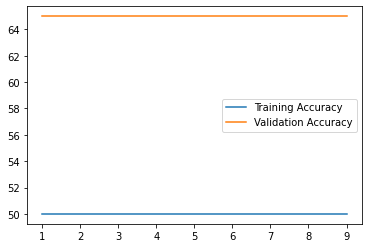

In [ ]:
#checking for overfitting
epochs=[1,2,3,4,5,6,7,8,9]
train_acc=[]
valid_acc=[]

for i in epochs:
    w=logistic_regression(train,0.1,0.001,i)
    train_acc.append((predict(train,w)[1]))
    valid_acc.append((predict(validation,w)[1]))

plt.plot(epochs,train_acc, label = "Training Accuracy")
plt.plot(epochs,valid_acc, label = "Validation Accuracy")
plt.legend()
plt.show()  

In [ ]:
#classification accuracy for different percentage of training samples
for i in range(9):
  train = df.sample(frac=((i+1)/10))
  test = df.drop(train.index)
  w=logistic_regression(train,0.2,0.001,5)
  pred1=predict(train,w)
  pred2=predict(test,w)
  print("Train Accuracy for ",(i+1)*10,"percentage of training samples: ",pred1[1])
  print("Test Accuracy for ",(i+1)*10,"percentage of training samples: ",pred2[1])
  print("\n")

NameError: ignored